In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
df.shape

(293, 3)

In [3]:
df = pd.read_csv('regression.csv')
df.head()

,date,seizure,HK_exports_to_Korea_logdiff
0,2001-02-01,5830.0,NaN
1,2001-03-01,4035.0,0.023309
2,2001-04-01,3636.0,-0.014729
3,2001-05-01,42145.0,-0.017692
4,2001-06-01,2973.0,-0.151941


In [8]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [5]:
df.shape

(293, 3)

C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


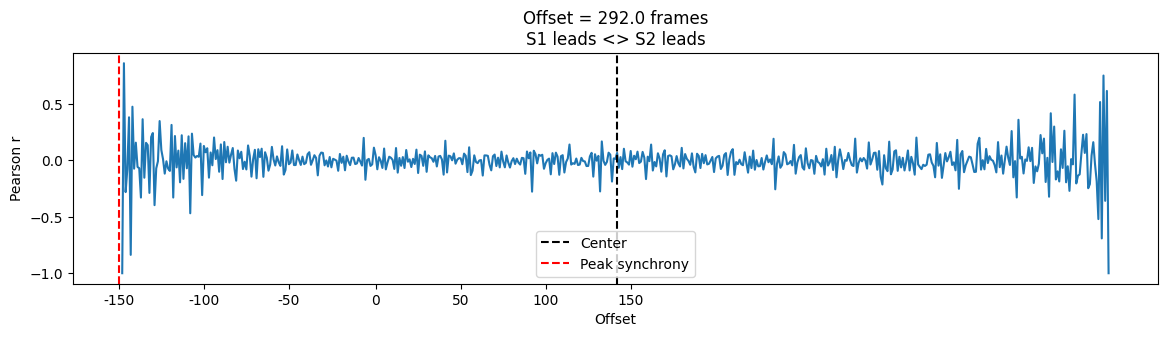

In [41]:
d1 = df['seizure']
d2 = df['HK_exports_to_Korea_logdiff']
max_lag =  df.shape[0]
rs = [crosscorr(d1,d2, lag) for lag in range(-int(max_lag),int(max_lag+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [45]:
rsseries = pd.Series(rs)
rsseries.skew()

np.float64(-0.7048020012138945)

C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\injae\AppData\Local\pypoetry\Cache\virtualenvs\myproject-yls16gN8-py3.12\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


[Text(0.5, 1.0, 'Rolling Windowed Time Lagged Cross Correlation'),
 (280.0, 308.0),
 Text(0.5, 80.7222222222222, 'Offset'),
 Text(95.72222222222221, 0.5, 'Epochs')]

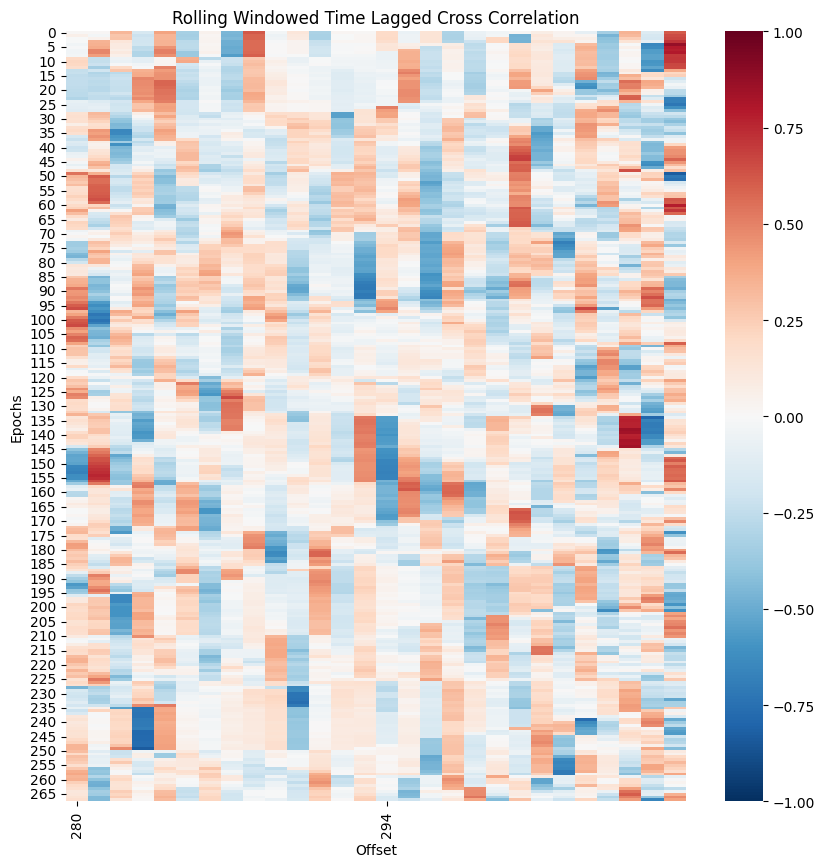

In [40]:
# Rolling window time lagged cross correlation
max_lag = df.shape[0]
window_size = 24 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
rss=[]
while t_end < df.shape[0]:
    d1 = df['seizure'].iloc[t_start:t_end]
    d2 = df['HK_exports_to_Korea_logdiff'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(max_lag),int(max_lag+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation', xlim = (280, 308), xlabel='Offset',ylabel='Epochs')

In [31]:
df.shape[0]

292